# tensorflow

这里的代码是用 TensorFlow2.x 完成的，但是应该也可以使用 TensorFlow1.x /PyTorch/MXNet/PaddlePaddle/CNTK 等其他深度学习框架实现。

https://www.tensorflow.org/api_docs/python/tf

https://www.tensorflow.org/guide/autodiff

https://www.tensorflow.org/guide/advanced_autodiff

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

tf.__version__

'2.6.0'

TensorFlow 的 Eager Execution 是一种命令式编程环境，可立即评估运算，无需构建计算图：运算会返回具体的值，而非构建供稍后运行的计算图。这样能使您轻松入门 TensorFlow 并调试模型，同时也减少了样板代码。

在 Tensorflow 2.0 中，默认启用 Eager Execution。
```python
import tensorflow as tf
tf.executing_eagerly()
```

## 张量操作
tf.Tensor

https://www.tensorflow.org/api_docs/python/tf/Tensor

请百度谷歌：TensorFlow 张量操作

### 数学操作符 

https://www.tensorflow.org/api_docs/python/tf/math

不同版本的TensorFlow的算术操作命令并不一样，这很令人恼火。

#### TensorFlow的算术操作如下：

如果 AttributeError ，尝试  tf.math.xxx，或者 搜索 tensorflow math-ops 或者 tf.math

| 操作  [如果 AttributeError ，尝试  tf.math.xxx]                      | 描述                                                         |
| :-------------------------- | :----------------------------------------------------------- |
| tf.add(x, y, name=None)     | 求和                                                         |
| tf.subtract(x, y, name=None)     | 减法                                                         |
| tf.multiply(x, y, name=None)     | 乘法                                                         |
| tf.divide(x, y, name=None)     | 除法                                                         |
| tf.mod(x, y, name=None)     | 取模                                                         |
| tf.abs(x, name=None)        | 求绝对值                                                     |
| tf.neg(x, name=None)        | 取负 (y = -x).                                               |
| tf.sign(x, name=None)       | 返回符号 y = sign(x) = -1 if x < 0; 0 if x == 0; 1 if x > 0. |
| tf.inv(x, name=None)        | 取反                                                         |
| tf.square(x, name=None)     | 计算平方 (y = x * x = x^2).                                  |
| tf.round(x, name=None)      | 舍入最接近的整数 # ‘a’ is [0.9, 2.5, 2.3, -4.4] tf.round(a) ==> [ 1.0, 3.0, 2.0, -4.0 ] |
| tf.sqrt(x, name=None)       | 开根号 (y = \sqrt{x} = x^{1/2}).                             |
| tf.pow(x, y, name=None)     | 幂次方  # tensor ‘x’ is [[2, 2], [3, 3]] # tensor ‘y’ is [[8, 16], [2, 3]] tf.pow(x, y) ==> [[256, 65536], [9, 27]] |
| tf.exp(x, name=None)        | 计算e的次方                                                  |
| tf.log(x, name=None)        | 计算log，一个输入计算e的ln，两输入以第二输入为底             |
| tf.maximum(x, y, name=None) | 返回最大值 (x > y ? x : y)                                   |
| tf.minimum(x, y, name=None) | 返回最小值 (x < y ? x : y)                                   |
| tf.cos(x, name=None)        | 三角函数cosine                                               |
| tf.sin(x, name=None)        | 三角函数sine                                                 |
| tf.tan(x, name=None)        | 三角函数tan                                                  |
| tf.atan(x, name=None)       | 三角函数ctan                                                 |





In [23]:
x = tf.constant(2.)
y = tf.constant(3.)

# 算术操作符：+ - * / % 
tf.add(x, y, name=None)        # 加法(支持 broadcasting)
tf.subtract(x, y, name=None)   # 减法
tf.multiply(x, y, name=None)   # 乘法
tf.divide(x, y, name=None)     # 浮点除法, 返回浮点数(python3 除法)
tf.math.mod(x, y, name=None)   # 取余  tf.mod(x, y, name=None)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [26]:
# 幂指对数操作符：^ ^2 ^0.5 e^ ln 
tf.pow(x, y, name=None)        # 幂次方
tf.square(x, name=None)        # 平方
tf.sqrt(x, name=None)          # 开根号，必须传入浮点数或复数
tf.exp(x, name=None)           # 计算 e 的次方
tf.math.log(x, name=None)      # 以 e 为底，必须传入浮点数或复数 tf.log(x, name=None)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6931472>

In [36]:
# 取符号、负、倒数、绝对值、近似、两数中较大/小的
tf.negative(x, name=None)      # 取负(y = -x).
tf.sign(x, name=None)          # 返回 x 的符号
tf.math.reciprocal(x, name=None)    # 取倒数
tf.abs(x, name=None)           # 求绝对值
tf.round(x, name=None)         # 四舍五入
tf.math.ceil(x, name=None)     # 向上取整
tf.floor(x, name=None)         # 向下取整
tf.math.rint(x, name=None)     # 取最接近的整数 
tf.maximum(x, y, name=None)    # 返回两tensor中的最大值 (x > y ? x : y)
tf.minimum(x, y, name=None)    # 返回两tensor中的最小值 (x < y ? x : y)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [37]:
# 三角函数和反三角函数
tf.cos(x, name=None)    
tf.sin(x, name=None)    
tf.tan(x, name=None)    
tf.acos(x, name=None)
tf.asin(x, name=None)
tf.atan(x, name=None)

<tf.Tensor: shape=(), dtype=float32, numpy=1.1071488>

In [49]:
# 其它
tf.divide(x, y, name=None)  # 计算 Python 风格的x除法y
tf.math.divide_no_nan(x, y) # 计算一个安全除法，如果y（分母）为零，则返回 0
tf.truediv(x, y, name=None) # Python 3 除法运算符语义
tf.math.floordiv(x, y, name=None)  # 按元素除，向最负整数舍入
tf.realdiv(x, y, name=None)   
# tf.truncatediv(x, y, name=None)  # 某些函数被弃置了
# tf.floor_div(x, y, name=None)
tf.truncatemod(x, y, name=None)
tf.math.floormod(x, y, name=None)  # 返回除法的元素余数
# tf.cross(x, y, name=None)
# tf.add_n(inputs, name=None)  # inputs: A list of Tensor objects, each with same shape and type
tf.math.squared_difference(x, y, name=None) 

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

### 矩阵、张量运算

https://www.tensorflow.org/api_docs/python/tf/linalg

如果 AttributeError ，尝试  tf.linalg.xxx，或者 搜索 tf.linalg

In [51]:
A = tf.constant([[1., 2.], [3., 4.]])
B = tf.constant([[5., 6.], [7., 8.]])

tf.add(A, B)    # 计算矩阵A和B的和 C = A+B
tf.subtract(A, B)    # 计算矩阵A和B的差 C = A-B
tf.multiply(A, B)    # 计算矩阵A和B的乘积 C = A*B 哈达马积 Hadamard product
tf.divide(A, B)    # 计算矩阵对应元素除法 C = A/B

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.2       , 0.33333334],
       [0.42857143, 0.5       ]], dtype=float32)>

In [52]:
k = tf.constant(3.)
tf.multiply(k, A)  # 数乘
tf.matmul(A, B)    # 矩阵乘积，点积
tf.reduce_sum(A, axis=None, keepdims=False, name=None) # 计算张量维度上的元素总和

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [53]:
tf.transpose(A, perm=None, name='transpose') # 转置，可以通过指定 perm=[1, 0] 来进行轴变换
tf.linalg.trace(A, name=None)  # 计算张量的迹
tf.linalg.det(A, name=None)    # 计算一个或多个方阵的行列式
tf.linalg.inv(A, name=None)    # 计算一个或多个平方可逆矩阵或其伴随矩阵（共轭转置）的逆
tf.linalg.svd(A, full_matrices=False, compute_uv=True, name=None) # 计算一个或多个矩阵的奇异值分解
tf.linalg.qr(A, full_matrices=None, name=None)  # 计算一个或多个矩阵的 QR 分解
tf.norm(A, ord='euclidean', axis=None, name=None) # 计算向量、矩阵和张量的范数

<tf.Tensor: shape=(), dtype=float32, numpy=5.4772253>

In [54]:
tf.eye(2, num_columns=None, batch_shape=None, dtype=tf.float32, name=None) # 构造一个单位矩阵，或一批矩阵
tf.linalg.diag(diagonal=[1,2,3], name=None) # 构建一个对角矩阵。返回具有给定成批对角线值的成批对角线张量

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])>

## 导数

### 一元显函数

**一阶导数**

$\large \frac{d}{dx}(y = x^2)\mid_{x=4}$

In [2]:
x = tf.Variable(initial_value=4.)
with tf.GradientTape() as g:
    y = tf.square(x)
y_grad = g.gradient(y, x)
print(y, y_grad)

tf.Tensor(16.0, shape=(), dtype=float32) tf.Tensor(8.0, shape=(), dtype=float32)


$\large \frac{d}{dx}(y = x^2)\mid_{x=3}$

如果x是常数，需要加 g.watch(x)

In [101]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x
dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


$\large \frac{d}{dx}(z = y^2 = x^4)\mid_{x=3}, \frac{d}{dx}(y = x^2)\mid_{x=3}, \frac{d}{dy}(z = y^2)\mid_{y=x^2=9}$

$\large 4x^3, 2x, 2y$

设置persistent=True，可以多次求导

In [30]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    y = x * x
    z = y * y
dz_dx = g.gradient(z, x)  # (4*x^3 at x = 3)
print(dz_dx)

dy_dx = g.gradient(y, x)  # (2*x at x = 3)
print(dy_dx)

dz_dy = g.gradient(z, y)  # (2*y at y = x^2 = 9)
print(dz_dy)

tf.Tensor(108.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(18.0, shape=(), dtype=float32)


逐元素计算

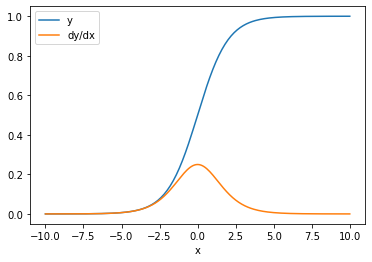

In [111]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.nn.sigmoid(x)

dy_dx = t.gradient(y, x)

plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.xlabel('x')
plt.legend()

**二阶导数**

$\large \frac{d}{dx}(y = x^2)\mid_{x=5}, \frac{d^2}{dx^2}(y = x^2)\mid_{x=5}$

In [2]:
x = tf.constant(5.0)
with tf.GradientTape() as g:
    g.watch(x)
    with tf.GradientTape() as gg:
        gg.watch(x)
        y = x * x
    dy_dx = gg.gradient(y, x)   # dy_dx = 2 * x
d2y_dx2 = g.gradient(dy_dx, x)  # d2y_dx2 = 2
print(dy_dx)

print(d2y_dx2)

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


**n阶导数**

$\large \frac{d^n}{dx^n}(y = f(x))\mid_{x=x_0}$

需要重写，我不精通数据结构与算法，写不出像 mathematica 那样的用法。

In [129]:
def diff(func:str, x, n:int, ifexec=False):
    """
    func: a string, such as func="y = x * x";
    x: tf.FloatTensor, such as x=tf.constant(1.0);
    n: a int number, Order of derivative, such as n=1;
    ifexec: 
    return dny_dxn: the value of order of derivative.
    example: 
        x = tf.constant(1.0)
        n = 3
        func = "y = x * x * x"
        diff(func, x, n)
    """
    if n<1:
        global y
        exec(func, globals())
    else:
        with tf.GradientTape() as g:
            g.watch(x)
            diff(func, x, n-1,ifexec)
            try:
                y = g.gradient(y, x)
            except TypeError:
                pass
    # print(n, y)
    if y== None: y = tf.constant(0.)
    if ifexec:
        # exec executes a Python statement stored in a string or file
        exec("d{0}y_dx{0} = y".format(n), globals())
    return y

In [21]:
# diff(func="y = x * x * x", x=tf.constant(1.0), n=3)  
# 这是一个错误用法，但是我还不知道为什么错

x = tf.constant(1.0)
diff(func="y = x * x * x", x=x, n=3)    # 这是正确用法

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

$\large \frac{d^5}{dx^5}(y = 2sin(x))\mid_{x=0}$

In [46]:
x = tf.constant(0.0)
n = 5
func = "y = 2*tf.sin(x)"
diff(func, x, n)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [131]:
x = tf.constant(1.)
n = 7
func = "y = x * x * x * x"
diff(func, x, n, ifexec=True)

for i in range(n):
    dny_dxn = "print('d{0}y_dx{0}: ', d{0}y_dx{0})".format(i)
    exec(dny_dxn, globals())

d0y_dx0:  tf.Tensor(1.0, shape=(), dtype=float32)
d1y_dx1:  tf.Tensor(4.0, shape=(), dtype=float32)
d2y_dx2:  tf.Tensor(12.0, shape=(), dtype=float32)
d3y_dx3:  tf.Tensor(24.0, shape=(), dtype=float32)
d4y_dx4:  tf.Tensor(24.0, shape=(), dtype=float32)
d5y_dx5:  tf.Tensor(0.0, shape=(), dtype=float32)
d6y_dx6:  tf.Tensor(0.0, shape=(), dtype=float32)


**误差**

In [132]:
x = tf.constant(1.)
# x = tf.constant(100000.)
n = 2
func = "y = x * x * x * x * x * x * x * x * x"  # 误差更小
# func = "y = tf.pow(x,9)"          # x增大时，tf.pow 会有误差,等价于 "y = x**9"
diff(func, x, n)    # y in [-3.4E+38,3.4E+38]

# for i in range(n):
#     dny_dxn = "print('d{0}y_dx{0}: ', d{0}y_dx{0})".format(i)
#     exec(dny_dxn, globals())

<tf.Tensor: shape=(), dtype=float32, numpy=72.0>

In [125]:
tf.pow(100.,4), tf.pow(100,4)  # 浮点数

(<tf.Tensor: shape=(), dtype=float32, numpy=100000010.0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=100000000>)

In [124]:
tf.pow(100.,10), tf.pow(100,10) # 溢出

(<tf.Tensor: shape=(), dtype=float32, numpy=9.999981e+19>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1661992960>)

**基本求导公式表**的实现：

## 偏导数

https://www.tensorflow.org/guide/autodiff

https://www.tensorflow.org/guide/advanced_autodiff

### 多元显函数

**一阶偏导**

2元函数

标量

$\large z = (x+2y)^2 = x^2+4y^2+4xy$

$\large \frac{\partial}{\partial x}(z = (x+2y)^2)\mid_{(x,y)=(1,0)}, \frac{\partial}{\partial y}(z = (x+2y)^2)\mid_{(x,y)=(1,0)}$

In [93]:
x = tf.constant(1.0)
y = tf.constant(0.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    g.watch(y)
    z = (x+2*y)*(x+2*y)
    
dz_dx = g.gradient(z, x)
dz_dy = g.gradient(z, y)
print(dz_dx, dz_dy)

tf.Tensor(2.0, shape=(), dtype=float32) tf.Tensor(4.0, shape=(), dtype=float32)


In [30]:
x = tf.constant(1.0)
y = tf.constant(1.0)
m = tf.constant(1.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    g.watch(y)
    g.watch(m)
    temp = 1*x
    temp += 2*y
    temp += 3*m
    z = tf.pow(temp,2)
    
dz_dx = g.gradient(z, x)
dz_dy = g.gradient(z, y)
dz_dm = g.gradient(z, m)
print(dz_dx, dz_dy, dz_dm)

tf.Tensor(12.0, shape=(), dtype=float32) tf.Tensor(24.0, shape=(), dtype=float32) tf.Tensor(36.0, shape=(), dtype=float32)


向量，多元函数

$\large z = (x_1+2x_2+\dots+nx_n)^2 = (\vec{k} \vec{x})^2$

$\large \frac{\partial}{\partial x_i}(z)\mid_{\vec{x}=\vec{1}}$

第一种方法：通过 exec 自动命名变量实现

In [55]:
n = 10

for i in range(n):
    exec("x_{}=tf.constant(1.0)".format(i+1), globals())
    
# for i in range(n):
#     s = "print('x_{0}: ', x_{0})".format(i+1)
#     exec(s, globals())
    
k = tf.constant([i+1.0 for i in range(n)])

with tf.GradientTape(persistent=True) as g:
    for i in range(n):
        exec("g.watch(x_{})".format(i+1), globals())
    temp = tf.constant(0.)
    for i in range(n):
        # exec("temp = k[{}]*x_{}".format(i, i+1), globals())
        exec("temp += tf.multiply(k[{}], x_{})".format(i, i+1), globals())
        # print(temp)
    z = tf.pow(temp,2)
    # print(z)
    

for i in range(n):
    s = "dz_dx{0} = g.gradient(z, x_{0})".format(i+1)
    exec(s, globals())
    s = "print('dz_dx{0}: ', dz_dx{0})".format(i+1)
    exec(s, globals())

dz_dx1:  tf.Tensor(110.0, shape=(), dtype=float32)
dz_dx2:  tf.Tensor(220.0, shape=(), dtype=float32)
dz_dx3:  tf.Tensor(330.0, shape=(), dtype=float32)
dz_dx4:  tf.Tensor(440.0, shape=(), dtype=float32)
dz_dx5:  tf.Tensor(550.0, shape=(), dtype=float32)
dz_dx6:  tf.Tensor(660.0, shape=(), dtype=float32)
dz_dx7:  tf.Tensor(770.0, shape=(), dtype=float32)
dz_dx8:  tf.Tensor(880.0, shape=(), dtype=float32)
dz_dx9:  tf.Tensor(990.0, shape=(), dtype=float32)
dz_dx10:  tf.Tensor(1100.0, shape=(), dtype=float32)


第二种方法：不批量命名变量，考虑为一个向量

In [59]:
n = 10  # 0, 1, 10,100,1000,10000---
x = tf.ones((n))  # 注意参数是元组 (n)
k = tf.constant([i+1.0 for i in range(n)])  # float
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    z = tf.pow(tf.reduce_sum(tf.multiply(k, x)),2) # reduce_sum
    
dz_dx = g.gradient(z, x)
print(dz_dx)

tf.Tensor([ 110.  220.  330.  440.  550.  660.  770.  880.  990. 1100.], shape=(10,), dtype=float32)


In [60]:
z

<tf.Tensor: shape=(), dtype=float32, numpy=3025.0002>

tf.reduce_sum 计算张量维度上元素的总和。如果忘记了，就错了。注意到这里z并不同，tensorflow会自动广播而不报错，需要小心谨慎。

In [61]:
n = 10  # 0, 1, 10,100,1000,10000---
x = tf.ones((n))  # 注意参数是元组 (n)
k = tf.constant([i+1.0 for i in range(n)])  # float
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    z = tf.pow(tf.multiply(k, x),2)
    
dz_dx = g.gradient(z, x)
print(dz_dx)

tf.Tensor(
[  2.        8.       18.       32.       50.       72.       98.00001
 128.      162.      200.     ], shape=(10,), dtype=float32)


In [62]:
z

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 1.      ,  4.      ,  9.      , 16.      , 24.999998, 36.      ,
       48.999996, 64.      , 81.      , 99.99999 ], dtype=float32)>

In [63]:
n = 100
x = tf.ones((n+1))  # 最后一维作为时间
# x = tf.ones((n+n))
(x,y) = x[:n],x[n:]

with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    g.watch(y)
    z = (x+2*y)*(x+2*y)
    
dz_dx = g.gradient(z, x)
dz_dy = g.gradient(z, y)
print(dz_dx, dz_dy)

tf.Tensor(
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6.], shape=(100,), dtype=float32) tf.Tensor([1200.], shape=(1,), dtype=float32)


矩阵、张量

$\large \mathbf{z} = (\mathbf{x}+2\mathbf{y})^2 = \mathbf{x}^2+4\mathbf{y}^2+4\mathbf{x}\mathbf{y}$

$\large \frac{\partial \mathbf{z}}{\partial \mathbf{x}}\mid_{(\mathbf{x},\mathbf{y})=(\mathbf{1},\mathbf{0})}, \frac{\partial \mathbf{z}}{\partial \mathbf{y}}\mid_{(\mathbf{x},\mathbf{y})=(\mathbf{1},\mathbf{0})}$

In [64]:
x = tf.zeros((4,4))  # ;y = tf.ones((4,4))
# x = tf.ones((4,4,4)) #;y = tf.ones((4,4,4))
# y = tf.constant(0.0)
y = tf.ones((4,4))

with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    g.watch(y)
    z = (x+2*y)*(x+2*y)
    
dz_dx = g.gradient(z, x)
dz_dy = g.gradient(z, y)
print(dz_dx, dz_dy)

tf.Tensor(
[[4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]], shape=(4, 4), dtype=float32) tf.Tensor(
[[8. 8. 8. 8.]
 [8. 8. 8. 8.]
 [8. 8. 8. 8.]
 [8. 8. 8. 8.]], shape=(4, 4), dtype=float32)


### n元函数的二阶偏导------黑塞矩阵

**Hessian Matrix 黑塞矩阵**

设 $Ω$ 是 $R^n$ 中的一个集合，$x=(x_1,x_2,\dots,x_n)$ 表示 $Ω$ 上的点。假设 $u=u(x):Ω \rightarrow R$ 是一个函数。对固定正整数 $k$，我们用符号 $D^k u$ 表示 $u$ 的所有 $k$ 阶偏导数 $\large \frac {\partial^k u} {\partial x_{i_1}\partial x_{i_2} \cdots \partial x_{i_k}}$，其中 $(i_1,i_2,\cdots,i_k)$ 是集合 $\{1,2,\cdots,n\}$ 中 $k$ 个元素的任意排列。$D^k u$ 可以被看成是 $n^k$ 维欧氏空间 $R^{n^k}$ 上的向量。

当 $k=1$ 时，我们称 $n$ 维向量 $\large Du = (\frac {\partial u} {\partial x_1}, \frac {\partial u} {\partial x_2}, \cdots, \frac {\partial u} {\partial x_n})$ 为 $u$ 的**梯度**；

当 $k=2$ 时，我们称 $n \times n$ 矩阵
$$
\Large
D^2u = \left[ \begin{matrix}
\frac {\partial^2 u} {\partial x^2_1} &  \frac {\partial^2 u} {\partial x_1 \partial x_2} &  \cdots &  \frac {\partial^2 u} {\partial x_1 \partial x_n} \\
\frac {\partial^2 u} {\partial x_2 \partial x_1} &  \frac {\partial^2 u} {\partial x^2_2} &  \cdots &  \frac {\partial^2 u} {\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots                 \\
\frac {\partial^2 u} {\partial x_n \partial x_1} &  \frac {\partial^2 u} {\partial x_n \partial x_2} &  \cdots &  \frac {\partial^2 u} {\partial x^2_n} \\
\end{matrix} \right]
$$
为 $u$ 的**Hessian 矩阵**；

二元函数的二阶偏导

$$
\large \frac{\partial^2}{\partial x^2}(z = (x+2y)^2)\mid_{(x,y)=(1,0)}, \frac{\partial^2}{\partial y^2}(z = (x+2y)^2)\mid_{(x,y)=(1,0)}, \\ 
\large \frac{\partial^2}{\partial x \partial y}(z = (x+2y)^2)\mid_{(x,y)=(1,0)}, \frac{\partial^2}{\partial y \partial x }(z = (x+2y)^2)\mid_{(x,y)=(1,0)}.\\
$$

In [2]:
x = tf.constant(1.0)
y = tf.constant(0.0)

with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    g.watch(y)
    with tf.GradientTape(persistent=True) as gg:
        gg.watch(x)
        gg.watch(y)
        z = (x+2*y)*(x+2*y)
    dz_dx = gg.gradient(z, x)
    dz_dy = gg.gradient(z, y)
    
d2z_dx2 = g.gradient(dz_dx, x)
d2z_dxy = g.gradient(dz_dx, y)

d2z_dy2 = g.gradient(dz_dy, y)
d2z_dyx = g.gradient(dz_dy, x)

print(dz_dx, dz_dy) # 一阶

print(d2z_dx2, d2z_dxy) # 二阶
print(d2z_dyx, d2z_dy2)

tf.Tensor(2.0, shape=(), dtype=float32) tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32) tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32) tf.Tensor(8.0, shape=(), dtype=float32)


三元函数的二阶偏导

In [3]:
x = tf.constant(1.0)
y = tf.constant(1.0)
m = tf.constant(1.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    g.watch(y)
    g.watch(m)
    with tf.GradientTape(persistent=True) as gg:
        gg.watch(x)
        gg.watch(y)
        gg.watch(m)
        z = (x+2*y+3*m)*(x+2*y+3*m)
    dz_dx = gg.gradient(z, x)
    dz_dy = gg.gradient(z, y)
    dz_dm = gg.gradient(z, m)
    
d2z_dx2 = g.gradient(dz_dx, x)
d2z_dxy = g.gradient(dz_dx, y)
d2z_dxm = g.gradient(dz_dx, m)

d2z_dy2 = g.gradient(dz_dy, y)
d2z_dyx = g.gradient(dz_dy, x)
d2z_dym = g.gradient(dz_dy, m)

d2z_dm2 = g.gradient(dz_dm, m)
d2z_dmx = g.gradient(dz_dm, x)
d2z_dmy = g.gradient(dz_dm, y)


print(dz_dx, dz_dy, dz_dm)
print(d2z_dx2, d2z_dxy, d2z_dxm)
print(d2z_dyx, d2z_dy2, d2z_dym)
print(d2z_dmx, d2z_dmy, d2z_dm2)

tf.Tensor(12.0, shape=(), dtype=float32) tf.Tensor(24.0, shape=(), dtype=float32) tf.Tensor(36.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32) tf.Tensor(4.0, shape=(), dtype=float32) tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32) tf.Tensor(8.0, shape=(), dtype=float32) tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32) tf.Tensor(12.0, shape=(), dtype=float32) tf.Tensor(18.0, shape=(), dtype=float32)


n元函数的二阶偏导

In [37]:
n = 5

for i in range(n):
    exec("x_{}=tf.constant(1.0)".format(i+1), globals())
# for i in range(n):
#     s = "print('x_{0}: ', x_{0})".format(i+1)
#     exec(s, globals())

k = tf.constant([i+1.0 for i in range(n)])

with tf.GradientTape(persistent=True) as g:
    for i in range(n):
        exec("g.watch(x_{})".format(i+1), globals())
        
    with tf.GradientTape(persistent=True) as gg:
        for i in range(n):
            exec("gg.watch(x_{})".format(i+1), globals())
            
        temp = tf.constant(0.)
        for i in range(n):
            exec("temp += tf.multiply(k[{}], x_{})".format(i, i+1), globals())
            # print(temp)
        z = tf.pow(temp,2)
        # print(z)
        
    gradient_vector = np.zeros((n))
    for i in range(n):
        s = "dz_dx{0} = gg.gradient(z, x_{0})".format(i+1)
        exec(s, globals())
        s = "gradient_vector[{0}] = dz_dx{1}".format(i,i+1)
        exec(s, globals())
        # s = "print('dz_dx{0}: ', dz_dx{0})".format(i+1)
        # exec(s, globals())
    gradient_vector = tf.constant(gradient_vector, dtype=tf.float32)
        
hessian_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        s = "d2z_dx{0}x{1} = g.gradient(dz_dx{0}, x_{1})".format(i+1,j+1)
        exec(s, globals())
        s = "hessian_matrix[{0}][{1}] = d2z_dx{2}x{3}".format(i,j,i+1,j+1)
        exec(s, globals())
        
        # s = "print('d2z_dx{0}x{1}: ', d2z_dx{0}x{1}.numpy(),end='\t')".format(i+1,j+1)
        # exec(s, globals())
    # print()
    
hessian_matrix = tf.constant(hessian_matrix, dtype=tf.float32)

gradient_vector, hessian_matrix

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 30.,  60.,  90., 120., 150.], dtype=float32)>,
 <tf.Tensor: shape=(5, 5), dtype=float32, numpy=
 array([[ 2.,  4.,  6.,  8., 10.],
        [ 4.,  8., 12., 16., 20.],
        [ 6., 12., 18., 24., 30.],
        [ 8., 16., 24., 32., 40.],
        [10., 20., 30., 40., 50.]], dtype=float32)>)

d2z_dx1xn这些变量不定义会返回 nan，但是定义了又没有什么用吧？

```python
n = 5

for i in range(n):
    exec("x_{}=tf.constant(1.0)".format(i+1), globals())

k = tf.constant([i+1.0 for i in range(n)])

with tf.GradientTape(persistent=True) as g:
    for i in range(n):
        exec("g.watch(x_{})".format(i+1), globals())
        
    with tf.GradientTape(persistent=True) as gg:
        for i in range(n):
            exec("gg.watch(x_{})".format(i+1), globals())
            
        temp = tf.constant(0.)
        for i in range(n):
            exec("temp += tf.multiply(k[{}], x_{})".format(i, i+1), globals())
        z = tf.pow(temp,2)
        
    gradient_vector = np.zeros((n))
    for i in range(n):
        s = "gradient_vector[{0}] = gg.gradient(z, x_{1})".format(i,i+1)
        exec(s, globals())
    gradient_vector = tf.constant(gradient_vector, dtype=tf.float32)
        
hessian_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        s = "hessian_matrix[{0}][{1}] = g.gradient(gradient_vector[{2}], x_{3})".format(i,j,i,j+1)
        exec(s, globals())
hessian_matrix = tf.constant(hessian_matrix, dtype=tf.float32)

gradient_vector, hessian_matrix
```

**GradientTape.jacobian**

tf 得到标量函数的二次导数,但这种模式并不能通用于生成黑塞矩阵, 因为 `GradientTape.gradient` 只计算标量的梯度。要构造黑塞矩阵，使用 `GradientTape.jacobian` 方法

对于未连接的梯度，得到 0 而不是 None 会比较方便。您可以使用 unconnected_gradients 参数来决定具有未连接的梯度时返回的内容

tape.gradient(z, x, unconnected_gradients=tf.UnconnectedGradients.ZERO)

In [76]:
n = 5
x = tf.Variable(tf.ones((n)))  # 注意参数是元组 (n)
k = tf.constant([i+1.0 for i in range(n)])  # float

with tf.GradientTape(persistent=True) as g:
    with tf.GradientTape(persistent=True) as gg:
        z = tf.pow(tf.reduce_sum(tf.multiply(k, x)),2)
    dz_dx = gg.jacobian(z, x)

# d2z_dx2 = g.gradient(dz_dx, x)  # 只能得到标量函数的二次导数
d2z_dx2 = g.jacobian(dz_dx, x)    # 生成黑塞矩阵

dz_dx, d2z_dx2

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 30.,  60.,  90., 120., 150.], dtype=float32)>,
 <tf.Tensor: shape=(5, 5), dtype=float32, numpy=
 array([[ 2.,  4.,  6.,  8., 10.],
        [ 4.,  8., 12., 16., 20.],
        [ 6., 12., 18., 24., 30.],
        [ 8., 16., 24., 32., 40.],
        [10., 20., 30., 40., 50.]], dtype=float32)>)

In [75]:
n = 5
x = tf.Variable(tf.ones((n)))  # 注意参数是元组 (n)
k = tf.constant([i+1.0 for i in range(n)])  # float
with tf.GradientTape(persistent=True) as g:
    with tf.GradientTape(persistent=True) as gg:
        with tf.GradientTape(persistent=True) as ggg:
            z = tf.pow(tf.reduce_sum(tf.multiply(k, x)),3)
        dz_dx = ggg.jacobian(z, x)
    
    # d2z_dx2 = g.gradient(dz_dx, x)  # 只能得到标量函数的二次导数
    d2z_dx2 = gg.jacobian(dz_dx, x)    # 生成黑塞矩阵

d3z_dx3 = g.jacobian(d2z_dx2, x)    # 生成黑塞矩阵

dz_dx, d2z_dx2, d3z_dx3

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 675., 1350., 2025., 2700., 3375.], dtype=float32)>,
 <tf.Tensor: shape=(5, 5), dtype=float32, numpy=
 array([[  90.,  180.,  270.,  360.,  450.],
        [ 180.,  360.,  540.,  720.,  900.],
        [ 270.,  540.,  810., 1080., 1350.],
        [ 360.,  720., 1080., 1440., 1800.],
        [ 450.,  900., 1350., 1800., 2250.]], dtype=float32)>,
 <tf.Tensor: shape=(5, 5, 5), dtype=float32, numpy=
 array([[[  6.,  12.,  18.,  24.,  30.],
         [ 12.,  24.,  36.,  48.,  60.],
         [ 18.,  36.,  54.,  72.,  90.],
         [ 24.,  48.,  72.,  96., 120.],
         [ 30.,  60.,  90., 120., 150.]],
 
        [[ 12.,  24.,  36.,  48.,  60.],
         [ 24.,  48.,  72.,  96., 120.],
         [ 36.,  72., 108., 144., 180.],
         [ 48.,  96., 144., 192., 240.],
         [ 60., 120., 180., 240., 300.]],
 
        [[ 18.,  36.,  54.,  72.,  90.],
         [ 36.,  72., 108., 144., 180.],
         [ 54., 108., 162., 216., 270.],
         [ 

In [77]:
n = 2  # 0, 1, 10,100,1000,10000---
m = 2
x = tf.ones((m, n))  # 注意参数是元组 (n)
k = tf.constant([i+1.0 for i in range(n)])  # float

with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    with tf.GradientTape(persistent=True) as gg:
        gg.watch(x)
        z = tf.pow(tf.reduce_sum(tf.multiply(k, x)),2)
    dz_dx = gg.gradient(z, x)

d2z_dx2 = g.jacobian(dz_dx, x)

dz_dx, d2z_dx2

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[12., 24.],
        [12., 24.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
 array([[[[2., 4.],
          [2., 4.]],
 
         [[4., 8.],
          [4., 8.]]],
 
 
        [[[2., 4.],
          [2., 4.]],
 
         [[4., 8.],
          [4., 8.]]]], dtype=float32)>)

### m元函数的n阶偏导、n阶全微分

*假设函数在定义域上无穷次可微*。

对一个m元函数$\large y = f(x_1,x_2,\dots,x_m)$求偏导得到一阶偏导数$df$，函数在定义域内关于$x_i$的偏导数记作$\large \frac{\partial f}{\partial x_i} 或 f_{x_i}$, 函数在点$x_0$关于$x_i$的偏导数$\large \frac{\partial f}{\partial x_i} (x_0) = \frac{\partial f}{\partial x_i}\mid_{x_0}$，函数在点$x_0$的方向导数(关于$x_1,x_2,\dots,x_m$的偏导数)是**梯度**，记作$$\large grad f(x_0) = \nabla f(x_0) = (\frac{\partial f}{\partial x_1}(x_0), \frac{\partial f}{\partial x_2}(x_0),\dots, \frac{\partial f}{\partial x_m}(x_0)).$$

函数$f$在点$x_0$的**全微分**记作$df(x_0)$,即
$$\large df(x_0) = \sum^m_{i=1} \frac{\partial f}{\partial x_i}(x_0)dx_i = \sum^m_{i=1} f_{x_i}(x_0)dx_i .$$

对一个m元函数$\large y = f(x_1,x_2,\dots,x_m)$关于$x_i$求偏导得到一阶偏导数$\large \frac{\partial f}{\partial x_i}$，对一阶偏导数再求偏导数得到二阶偏导数$\large \frac{\partial^2 f}{\partial x_j \partial x_i}$，对二阶偏导数再求偏导数得到三阶偏导数$\large \frac{\partial^3 f}{\partial x_k \partial x_j \partial x_i }$，可得n阶偏导数为$\large \frac{\partial^n f}{\partial x_{i_n} \dots \partial x_{i_2} \partial x_{i_1} } = f_{x_{i_n}\dots x_{i_2}x_{i_1}} .$

m元函数$f$在点$x_0$的一阶全微分记作$df(x_0)$,即$\large df(x_0) = \sum^m_{i=1} \frac{\partial f}{\partial x_i}(x_0)dx_i = \sum^m_{i=1} f_{x_i}(x_0)dx_i .$

m元函数$f$在点$x_0$的二阶全微分记作$d^2 f(x_0)$,是一个以对称矩阵$\large (f_{x_i x_j}(x_0))_{m\times m}$为系数矩阵的二次型，叫黑塞矩阵，即
$$
\large \boldsymbol{H} f(x_0) = (f_{x_i x_j}(x_0))_{m\times m} = 
\left[ \begin{matrix}
\frac {\partial^2 f} {\partial x^2_1} (x_0) &  \frac {\partial^2 f} {\partial x_1 \partial x_2} (x_0) &  \cdots &  \frac {\partial^2 f} {\partial x_1 \partial x_m} (x_0) \\
\frac {\partial^2 f} {\partial x_2 \partial x_1} (x_0) &  \frac {\partial^2 f} {\partial x^2_2} (x_0)&  \cdots &  \frac {\partial^2 f} {\partial x_2 \partial x_m} (x_0)\\
\vdots & \vdots & \ddots & \vdots                 \\
\frac {\partial^2 f} {\partial x_m \partial x_1} (x_0)&  \frac {\partial^2 f} {\partial x_m \partial x_2} (x_0) &  \cdots &  \frac {\partial^2 f} {\partial x^2_m} (x_0) \\
\end{matrix} \right].
$$

m元函数$f$在点$x_0$的n阶全微分记作$d^n f(x_0)$，它的系数构成一个n阶张量$T_nf(x_0)$，它的形状是$(m,m,\dots,m)$，一共有n个m(在同构的意义下，第零阶张量为标量，第一阶张量为向量， 第二阶张量为矩阵)。经典的方法把张量视为多维数组，张量的元素是数组中的值。
$$\large \boldsymbol{T_n} f(x_0) = (f_{x_{i_n}\dots x_{i_2}x_{i_1}} (x))_{(m \times m \times \dots \times m)_n} .$$



### m元复合函数的偏导数

一个n维m元向量函数
$$\large \boldsymbol{F}(\boldsymbol{x}) = (F_1(x_1,x_2,\dots,x_m), F_2(x_1,x_2,\dots,x_m), \dots, F_n(x_1,x_2,\dots,x_m))$$
一个可微函数$g$, 考虑m元复合函数记为 $\large g \circ \boldsymbol{F} = g(\boldsymbol{F}(x))$。


向量函数$\boldsymbol{F}(x)$的**雅可比矩阵**，记作
$$
\large
\frac{D \boldsymbol{F}(x)}{D x} = \left[ \begin{matrix}
\frac {\partial F_1(x)} {\partial x_1} &  \frac {\partial F_1(x)} {\partial x_2} &  \cdots &  \frac {\partial F_1(x)} {\partial x_m} \\
\frac {\partial F_2(x)} {\partial x_1} &  \frac {\partial F_2(x)} {\partial x_2} &  \cdots &  \frac {\partial F_2(x)} {\partial x_m} \\
\vdots & \vdots & \ddots & \vdots                 \\
\frac {\partial F_n(x)} {\partial x_1} &  \frac {\partial F_n(x)} {\partial x_2} &  \cdots &  \frac {\partial F_n(x)} {\partial x_m} \\
\end{matrix} \right].
$$

则复合函数 $g \circ \boldsymbol{F}$ 的偏导数为：$$\nabla (g(\boldsymbol{F}(x))) = \nabla g(y) \mit_{y=\boldsymbol{F}(x)} \frac{D \boldsymbol{F}(x)}{D x}.$$

## 张量求导


#### 对标量求导

1. 标量对标量求导，结果是个标量
事实上就是一元函数求一阶导$\frac{dy}{dx}$，通过一元函数的n阶导求n+1阶导。
2. 向量对标量求导，结果是个向量
事实上就是向量的每一个元素对标量求导，n个一元函数(线性无关的n元函数)求一阶导$\frac{d y_i}{d x_i}$。
3. 矩阵对标量求导，结果是个矩阵
事实上也就是矩阵的每一个元素对标量求导，$m \times n$个一元函数求一阶导$\frac{d y_{ij}}{d x_{ij}}$。
4. n阶张量对标量求导，结果是个矩阵
事实上也就是n阶张量的每一个元素对标量求导，$m_1 \times m_2 \times \dots \times m_n$个一元函数求一阶导$\frac{d y_{i_{1}...i_{n}}}{d x_{i_{1}...i_{n}}}$。

####  对向量求导

1. 标量对向量求导，结果是向量
事实上这就是所谓的Gradient，记为n元(标量)函数的梯度 $\nabla f$ ；也可以看成多元函数求一阶偏导数。
2. 向量对向量求导，结果是矩阵
这个当然也是gradient，当然这准确的说应该叫matrix gradient. 可以看成对多元函数一阶偏导数求二阶偏导数，又如向量函数$\boldsymbol{F}(x)$的雅可比矩阵。
3. 矩阵对向量求导，结果是个三阶张量
对多元函数二阶偏导数求三阶偏导数。
4. n阶张量对向量求导，结果是n+1阶张量
对多元函数n阶偏导数求n+1阶偏导数。





####  对矩阵求导

1. 标量对矩阵求导，结果是矩阵
事实上这一类，主要是考虑一类标量函数对矩阵的导数，一般是det,trace,log(det)等等
2. 向量对矩阵求导，结果是3阶张量
对多元函数n阶偏导数求n+1阶偏导数。
3. 矩阵对矩阵求导，结果是4阶张量
对多元函数n阶偏导数求n+1阶偏导数。
4. n阶张量对矩阵求导，结果是n+2阶张量
对多元函数n阶偏导数求n+1阶偏导数。

#### 对张量求导

**结论：n阶张量对m阶张量求导，结果是n+m阶张量。**

标量是0阶张量，向量是1阶张量，矩阵是2阶张量。

### tf张量求导

GradientTape.jacobian, GradientTape.batch_jacobian

In [84]:
with tf.GradientTape() as g:
    x = tf.constant([[1., 2.], [3., 4.]], dtype=tf.float32)
    g.watch(x)
    y = x * x
jacobian = g.jacobian(y, x)
jacobian # [[[2,  0], [0,  4]], [[6,  0], [0,  8]]]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[2., 0.],
         [0., 0.]],

        [[0., 4.],
         [0., 0.]]],


       [[[0., 0.],
         [6., 0.]],

        [[0., 0.],
         [0., 8.]]]], dtype=float32)>

In [85]:
with tf.GradientTape() as g:
    x = tf.constant([[1., 2.], [3., 4.]], dtype=tf.float32)
    g.watch(x)
    y = x * x
batch_jacobian = g.batch_jacobian(y, x)
batch_jacobian # [[[2,  0], [0,  4]], [[6,  0], [0,  8]]]

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[2., 0.],
        [0., 4.]],

       [[6., 0.],
        [0., 8.]]], dtype=float32)>

In [79]:
n = 5
x = tf.Variable(tf.ones((n)))  # 注意参数是元组 (n)
k = tf.constant([i+1.0 for i in range(n)])  # float
with tf.GradientTape(persistent=True) as g:
    with tf.GradientTape(persistent=True) as gg:
        with tf.GradientTape(persistent=True) as ggg:
            z = tf.pow(tf.reduce_sum(tf.multiply(k, x)),3)
        dz_dx = ggg.jacobian(z, x)
    
    # d2z_dx2 = g.gradient(dz_dx, x)  # 只能得到标量函数的二次导数
    d2z_dx2 = gg.jacobian(dz_dx, x)    # 生成黑塞矩阵

d3z_dx3 = g.jacobian(d2z_dx2, x)    # 生成三阶张量

dz_dx, d2z_dx2, d3z_dx3

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 675., 1350., 2025., 2700., 3375.], dtype=float32)>,
 <tf.Tensor: shape=(5, 5), dtype=float32, numpy=
 array([[  90.,  180.,  270.,  360.,  450.],
        [ 180.,  360.,  540.,  720.,  900.],
        [ 270.,  540.,  810., 1080., 1350.],
        [ 360.,  720., 1080., 1440., 1800.],
        [ 450.,  900., 1350., 1800., 2250.]], dtype=float32)>,
 <tf.Tensor: shape=(5, 5, 5), dtype=float32, numpy=
 array([[[  6.,  12.,  18.,  24.,  30.],
         [ 12.,  24.,  36.,  48.,  60.],
         [ 18.,  36.,  54.,  72.,  90.],
         [ 24.,  48.,  72.,  96., 120.],
         [ 30.,  60.,  90., 120., 150.]],
 
        [[ 12.,  24.,  36.,  48.,  60.],
         [ 24.,  48.,  72.,  96., 120.],
         [ 36.,  72., 108., 144., 180.],
         [ 48.,  96., 144., 192., 240.],
         [ 60., 120., 180., 240., 300.]],
 
        [[ 18.,  36.,  54.,  72.,  90.],
         [ 36.,  72., 108., 144., 180.],
         [ 54., 108., 162., 216., 270.],
         [ 

In [ ]:
def diff(func:str, x, n:int, ifexec=False):
    if n<1:
        global y
        exec(func, globals())
    else:
        with tf.GradientTape(persistent=True) as g:
            g.watch(x)
            diff(func, x, n-1,ifexec)
        try:
            y = g.jacobian(y, x)
        except TypeError:
            pass
    # print(n, y)
    if y== None: y = tf.constant(0.)
    if ifexec:
        # exec executes a Python statement stored in a string or file
        exec("d{0}y_dx{0} = y".format(n), globals())
    return y

In [45]:
n = [1,2,3]
dic = {"x_1": n[0],"x_2": n[1],"x_3": n[2],}

dic

{'x_1': 1, 'x_2': 2, 'x_3': 3}

In [63]:
def diff2(func:str, kwargs:dict, ifexec=False):
    print(func, ifexec)
    order_number = 0
    n_dim =  0
    for key, value in kwargs.items():
        print(key, value)
        order_number += value
        n_dim += 1
    print(n_dim, order_number)
    
    

n = [1,0,1]

for i in range(len(n)):
    exec("x_{}=tf.constant(1.0)".format(i+1), globals())

func = """
temp = tf.constant(0.)
for i in range(n):
    exec("temp += tf.multiply(k[{}], x_{})".format(i, i+1), globals())
    # print(temp)
z = tf.pow(temp,2)
"""
dic = {"x_1": n[0],"x_2": n[1],"x_3": n[2],}
diff2(func=func, kwargs=dic)


temp = tf.constant(0.)
for i in range(n):
    exec("temp += tf.multiply(k[{}], x_{})".format(i, i+1), globals())
    # print(temp)
z = tf.pow(temp,2)
 False
x_1 1
x_2 0
x_3 1
3 2


In [60]:
n = [1,2,3]

len(n)

6

In [ ]:
diff(func,{x_1,n[0]}, {x_2,n[0]},{x_3,n[0]},)

In [ ]:
n = 5

for i in range(n):
    exec("x_{}=tf.constant(1.0)".format(i+1), globals())
# for i in range(n):
#     s = "print('x_{0}: ', x_{0})".format(i+1)
#     exec(s, globals())

k = tf.constant([i+1.0 for i in range(n)])

In [ ]:
diff(func, x, nlist)

In [56]:
func = """
a = 1
b = 2
exec("c = 3")
exec("print(a+b+c)")
print(a+b+c)
"""

exec(func)

6
6


In [73]:
def diff(func:str, x, n:int, ifexec=False):
    """
    func: a string, such as func="y = x * x";
    x: tf.FloatTensor, such as x=tf.constant(1.0);
    n: a int number, Order of derivative, such as n=1;
    ifexec: 
    return dny_dxn: the value of order of derivative.
    example: 
        x = tf.constant(1.0)
        n = 3
        func = "y = x * x * x"
        diff(func, x, n)
    """
    if n<1:
        global y
        exec(func, globals())
    else:
        with tf.GradientTape(persistent=True) as g:
            g.watch(x)
            diff(func, x, n-1,ifexec)
        try:
            y = g.gradient(y, x)
        except TypeError:
            pass
    # print(n, y)
    if y== None: y = tf.constant(0.)
    if ifexec:
        # exec executes a Python statement stored in a string or file
        exec("d{0}y_dx{0} = y".format(n), globals())
    return y

In [74]:
x = tf.constant([1.,2.,3.,4.])
n = 2
func = "y = 2.*tf.sin(x)+tf.pow(x,2)"
diff(func=func, ifexec=False, x=x,n=n)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.31705797, 0.18140507, 1.71776   , 3.513605  ], dtype=float32)>

In [46]:
def diff2(func:str, kwargs, ifexec=False, ):
    print(func, ifexec)
    for key, value in kwargs.items():
        print(key, value)
        
x = tf.constant(0.0)
n = 5
func = "y = 2*tf.sin(x)"
diff2(func=func, kwargs={"x": n})

y = 2*tf.sin(x) False
x 5


https://reference.wolfram.com/language/ref/D.html.zh

D[f, {x, n}, {y, n}]

D[Sin[x]^10, {x, 4}]

D[Sin[x y]/(x^2 + y^2), x, y]

D[x^2 E^(5 y), {x, 2}, {y, 3}]

In [97]:
x = tf.constant(0.0)
n = 5
func = "y = 2*tf.sin(x)"
diff(func, x, n)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
x = tf.constant(0.0)
n = 5
func = "y = 2*tf.sin(x)"
diff(func, x, n)

## SymPy

SymPy 是一个符号计算的Python库.


```
conda install sympy
pip install sympy
```

In [100]:
from sympy import symbols, diff

In [101]:
x, y = symbols('x, y')

z = x**2+y**2+x*y+2
print(z)
result = z.subs({x: 1, y: 2})   # 用数值分别对x、y进行替换
print(result)

dx = diff(z, x)   # 对x求偏导
print(dx)
result = dx.subs({x: 1, y: 2})
print(result)

dy = diff(z, y)   # 对y求偏导
print(dy)
result = dy.subs({x: 1, y: 2})
print(result)

x**2 + x*y + y**2 + 2
9
2*x + y
4
x + 2*y
5


In [ ]:
geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

lambda_1 = 1
lambda_2 = 0.0025
d = 100

def pde(x, y):
    dy_x = tf.gradients(y, x)[0]
    dy_x, dy_t = dy_x[:, 0:d], dy_x[:, d:]
    dy_xx = tf.gradients(dy_x, x)[0][:, 0:d]
    dy_xxx = tf.gradients(dy_xx, x)[0][:, 0:d]
    return dy_t + lambda_1*y*dy_x +  lambda_2*dy_xxx

bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, lambda x: np.cos(np.pi * x[:, 0:d]), lambda _, on_initial: on_initial)

data = dde.data.TimePDE(geomtime, pde, [bc, ic], num_domain=8000, num_boundary=400, num_initial=800)

In [ ]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch"""
import deepxde as dde
import numpy as np



In [152]:
geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

lambda_1 = 1
lambda_2 = 0.0025
d = 100

def pde(x, y):
    dy_x = tf.gradients(y, x)[0]
    dy_x, dy_t = dy_x[:, 0:d], dy_x[:, d:]
    dy_xx = tf.gradients(dy_x, x)[0][:, 0:d]
    dy_xxx = tf.gradients(dy_xx, x)[0][:, 0:d]
    return dy_t + lambda_1*y*dy_x +  lambda_2*dy_xxx

bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, lambda x: np.cos(np.pi * x[:, 0:d]), lambda _, on_initial: on_initial)

data = dde.data.TimePDE(geomtime, pde, [bc, ic], num_domain=8000, num_boundary=400, num_initial=800)

In [155]:
data.train_next_batch(64)[0].shape

(10400, 2)

In [142]:



net = dde.nn.FNN([d+1] + [20] * 3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)

model.compile("adam", lr=1e-3)
model.train(epochs=15000)
model.compile("L-BFGS")
losshistory, train_state = model.train()

Compiling model...
Building feed-forward neural network...
'build' took 0.053891 s



RuntimeError: IC func should return an array of shape N by 1 for a single component.Use argument 'component' for different components.

In [1]:
import deepxde as dde
import numpy as np

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



In [2]:
import deepxde as dde
import numpy as np

def pde(x, y):
    dy_x = dde.grad.jacobian(y, x, i=0, j=0)
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t + y * dy_x - 0.01 / np.pi * dy_xx

geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 0.99)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(
    geomtime, lambda x: -np.sin(np.pi * x[:, 0:1]), lambda _, on_initial: on_initial
)

data = dde.data.TimePDE(
    geomtime, pde, [bc, ic], num_domain=2540, num_boundary=80, num_initial=160
)

for i in [1, 10, 128]:
    print(data.train_next_batch(batch_size=i)[0].shape)
    print(data.test(batch_size=i)[0].shape)

G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


In [19]:
for i in [1, 10, 128]:
    print(data.train_next_batch(batch_size=i)[0].shape)
    print(data.test(batch_size=i)[0].shape)

(9200, 2)
(9200, 2)
(9200, 2)
(9200, 2)
(9200, 2)
(9200, 2)


(9200, 2)
(9200, 2)


(3020, 2)

In [8]:
import deepxde as dde
import numpy as np
from scipy.io import loadmat
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Import torch if using backend pytorch
# import torch

In [9]:

geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)
d = 0.001

def pde(x, y):
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t - d * dy_xx - 5 * (y - y**3)

# Hard restraints on initial + boundary conditions
# Backend tensorflow.compat.v1 or tensorflow
def output_transform(x, y):
    return x[:, 0:1]**2 * tf.cos(np.pi * x[:, 0:1]) + x[:, 1:2] * (1 - x[:, 0:1]**2) * y

# Backend pytorch
# def output_transform(x, y):
#     return x[:, 0:1]**2 * torch.cos(np.pi * x[:, 0:1]) + x[:, 1:2] * (1 - x[:, 0:1]**2) * y

data = dde.data.TimePDE(geomtime, pde, [], num_domain=8000, num_boundary=400, num_initial=800)

G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+8002=8002. 
  warnings.warn("The balance properties of Sobol' points require "
G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+402=402. 
  warnings.warn("The balance properties of Sobol' points require "
G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+802=802. 
  warnings.warn("The balance properties of Sobol' points require "


In [17]:
data.train_next_batch(batch_size=7)[0].shape

(9200, 2)

In [11]:
data.test()[0].shape

(9200, 2)

In [1]:
import deepxde as dde
import numpy as np

def pde(x, y):
    dy_x = dde.grad.jacobian(y, x, i=0, j=0)
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t + y * dy_x - 0.01 / np.pi * dy_xx

geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 0.99)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(
    geomtime, lambda x: -np.sin(np.pi * x[:, 0:1]), lambda _, on_initial: on_initial
)

data = dde.data.TimePDE(
    geomtime, pde, [bc, ic], num_domain=2540, num_boundary=80, num_initial=160
)

for i in [1, 10, 128]:
    print(data.train_next_batch(batch_size=i)[0].shape)
    print(data.test(batch_size=i)[0].shape)

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term

(3020, 2)
(3020, 2)
(3020, 2)
(3020, 2)
(3020, 2)
(3020, 2)


G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


In [2]:
# https://github.com/lululxvi/deepxde/blob/master/examples/pinn_forward/fractional_Poisson_3d.py
"""Backend supported: tensorflow.compat.v1"""
import deepxde as dde
import numpy as np
from deepxde.backend import tf
from scipy.special import gamma

In [3]:
alpha = 1.8


def fpde(x, y, int_mat):
    """\int_theta D_theta^alpha u(x)"""
    if isinstance(int_mat, (list, tuple)) and len(int_mat) == 3:
        int_mat = tf.SparseTensor(*int_mat)
        lhs = tf.sparse_tensor_dense_matmul(int_mat, y)
    else:
        lhs = tf.matmul(int_mat, y)
    lhs = lhs[:, 0]
    lhs *= gamma((1 - alpha) / 2) * gamma((3 + alpha) / 2) / (2 * np.pi ** 2)
    x = x[: tf.size(lhs)]
    rhs = (
        2 ** alpha
        * gamma(2 + alpha / 2)
        * gamma((3 + alpha) / 2)
        / gamma(3 / 2)
        * (1 - (1 + alpha / 3) * tf.reduce_sum(x ** 2, axis=1))
    )
    return lhs - rhs


def func(x):
    return (np.abs(1 - np.linalg.norm(x, axis=1, keepdims=True) ** 2)) ** (
        1 + alpha / 2
    )


geom = dde.geometry.Sphere([0, 0, 0], 1)
bc = dde.icbc.DirichletBC(geom, func, lambda _, on_boundary: on_boundary)

data = dde.data.FPDE(
    geom,
    fpde,
    alpha,
    bc,
    [8, 8, 100],
    num_domain=256,
    num_boundary=1,
    solution=func,
)

G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+258=258. 
  warnings.warn("The balance properties of Sobol' points require "
G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+3=3. 
  warnings.warn("The balance properties of Sobol' points require "


In [4]:
for i in [1, 10, 128]:
    print(data.train_next_batch(batch_size=i)[0].shape)
    print(data.test(batch_size=i)[0].shape)

(1251989, 3)
(1251988, 3)
(1251989, 3)
(1251988, 3)
(1251989, 3)
(1251988, 3)


In [ ]:
net = dde.nn.FNN([3] + [20] * 4 + [1], "tanh", "Glorot normal")
net.apply_output_transform(
    lambda x, y: (1 - tf.reduce_sum(x ** 2, axis=1, keepdims=True)) * y
)

model = dde.Model(data, net)
model.compile("adam", lr=1e-3)
losshistory, train_state = model.train(epochs=10000)
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

X = geom.random_points(10000)
y_true = func(X)
y_pred = model.predict(X)
print("L2 relative error:", dde.metrics.l2_relative_error(y_true, y_pred))
np.savetxt("test.dat", np.hstack((X, y_true, y_pred)))